Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.





WORKFLOW :
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction


In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [288]:
cd /content/drive/MyDrive/AIC_DL_Assignment/flowers

/content/drive/MyDrive/AIC_DL_Assignment/flowers


In [289]:
import numpy as np
import pandas as pd
import PIL
import os
import cv2

In [290]:
location = '/content/drive/MyDrive/AIC_DL_Assignment/flowers/'


In [291]:


folders = os.listdir('/content/drive/MyDrive/AIC_DL_Assignment/flowers/')

In [292]:
folders

['sunflower', 'rose', 'tulip', 'dandelion', 'daisy', '.ipynb_checkpoints']

In [293]:
folders.remove('.ipynb_checkpoints')

In [294]:
X = []
Y = []
# Read Images
height = 135
width = 135
for folder in folders:
    linked_file = os.path.join(location, folder)
    for img in os.listdir(linked_file):
        image = cv2.imread(os.path.join(linked_file, img), cv2.IMREAD_GRAYSCALE)
        print(image)
        try:
          image = cv2.resize(image, (height, width))
          print(image.shape)        
        except:
          break
        
        X.append(np.array(image))
        Y.append(str(folder))
    

Streaming output truncated to the last 5000 lines.
[[ 16   8   4 ...  65  43  55]
 [  9   8   7 ...  51  58  74]
 [ 10   9   2 ...  53  66  84]
 ...
 [ 93  91  89 ... 129 133 132]
 [101  97  93 ... 124 125 124]
 [ 95  96  98 ... 152 185 206]]
(135, 135)
[[81 80 79 ... 18 19 19]
 [81 80 80 ... 19 20 21]
 [81 80 80 ... 19 20 21]
 ...
 [50 41 33 ...  8  8 10]
 [49 41 34 ...  8  8 10]
 [42 37 31 ...  8  8 10]]
(135, 135)
[[ 66  66  66 ... 210 210 211]
 [ 63  64  64 ... 210 210 211]
 [ 61  62  62 ... 210 211 211]
 ...
 [  2   6  11 ... 192 198 197]
 [  9   7  12 ... 194 197 192]
 [  6   2   7 ... 202 204 197]]
(135, 135)
[[ 71  79  72 ... 102  89  70]
 [ 89  98  68 ...  82  82  54]
 [ 94 109  83 ... 101  67  59]
 ...
 [ 42  26  13 ...   3   2   7]
 [ 32  20  23 ...   7   5   4]
 [ 32  29  33 ...  13  13  10]]
(135, 135)
[[218 182  31 ... 239 255 247]
 [243   2 213 ... 160 231 244]
 [210   9 102 ... 131  82 245]
 ...
 [ 16  32  40 ...  83  87  71]
 [ 18  35  46 ...  71  86 109]
 [ 22  30  42

In [295]:
X = np.array(X)
print(X.shape)

(4129, 135, 135)


In [296]:
print(X.max())

255


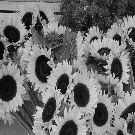

In [297]:
from google.colab.patches import cv2_imshow

cv2_imshow(X[660])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [298]:
X[0].shape

(135, 135)

In [299]:
X = X.reshape(4129, height*width)
X = X.astype('float32')/255

In [300]:
X[0]

array([0.07843138, 0.09019608, 0.07843138, ..., 0.29803923, 0.22352941,
       0.08627451], dtype=float32)

In [301]:
Y = np.array(Y)
print(Y.shape)


(4129,)


In [302]:
Label = pd.Series(Y, index=range(0, len(X)))

In [303]:
Label.value_counts()

tulip        984
dandelion    858
rose         784
daisy        769
sunflower    734
dtype: int64

In [304]:
flower_codes = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}

In [305]:
Label = Label.replace(flower_codes)
print(Label)

0       3
1       3
2       3
3       3
4       3
       ..
4124    0
4125    0
4126    0
4127    0
4128    0
Length: 4129, dtype: int64


In [306]:
seed = 100
np.random.seed(seed)
np.random.shuffle(X)
np.random.shuffle(Label)

In [307]:

from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(X, Label, test_size=0.3, random_state=0)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.2)

In [308]:
print(test_data.shape)
print(test_label.shape)
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(1239, 18225)
(1239,)
(2312, 18225)
(2312,)
(578, 18225)
(578,)


In [309]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(layers.Dense(600, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [310]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [311]:
history = model.fit(train_data,train_label,  epochs=100, batch_size=200, validation_data=(val_data, val_label))

Epoch 1/100
12/12 [==============================] - 4s 285ms/step - loss: 0.0000e+00 - accuracy: 0.2109 - val_loss: 0.0000e+00 - val_accuracy: 0.2093
Epoch 2/100
12/12 [==============================] - 3s 265ms/step - loss: 0.0000e+00 - accuracy: 0.2179 - val_loss: 0.0000e+00 - val_accuracy: 0.2093
Epoch 3/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0000e+00 - accuracy: 0.2103 - val_loss: 0.0000e+00 - val_accuracy: 0.2093
Epoch 4/100
12/12 [==============================] - 3s 269ms/step - loss: 0.0000e+00 - accuracy: 0.2190 - val_loss: 0.0000e+00 - val_accuracy: 0.2093
Epoch 5/100
12/12 [==============================] - 3s 264ms/step - loss: 0.0000e+00 - accuracy: 0.2188 - val_loss: 0.0000e+00 - val_accuracy: 0.2093
Epoch 6/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0000e+00 - accuracy: 0.2154 - val_loss: 0.0000e+00 - val_accuracy: 0.2093
Epoch 7/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0000e+00 - accura

In [312]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, 101)

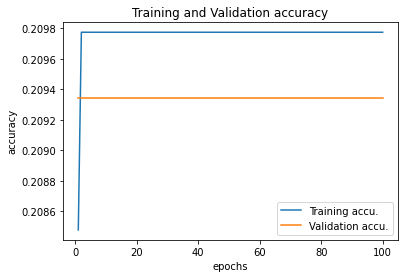

In [314]:
import matplotlib.pyplot as plt
plt.plot(epochs, training_accuracy, label='Training accu.')
plt.plot(epochs, val_accuracy, label='Validation accu.')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [316]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 600)               10935600  
_________________________________________________________________
dropout_21 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 400)               240400    
_________________________________________________________________
dropout_22 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 10)                4010      
_________________________________________________________________
dropout_23 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 1)               

In [317]:

model.evaluate(test_data, test_label)

39/39 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2034


[0.0, 0.20338982343673706]